In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("./data/bike-sharing-demand/train.csv", parse_dates=True, index_col=0)

In [136]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,h
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,4


### Column Explanation
* season: Season
    - 1:winter
    - 2:spring
    - 3:summer
    - 4:autumn
* holiday: weather day is holiday or not (extracted from Holiday Schedule)
* workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
* humidity: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [5]:
df.shape

(10886, 11)

The dataset comprises almost 11,000 obervations and 11 features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Observation:
* Apparently, there are no NaN-Values in this dataset

In [9]:
corrM = df.corr()
corrM

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Observation:

* The Matrix indicates a correlation between "temp" and count. We will check to what degree the temperature and the weather condition affect the "count" column further down

### Create two subsets of the overall dataset

In [79]:
df_awake = df[(df.index.hour > 6) & (df.index.hour < 22)]

In [ ]:
df_12h = df[df.index.hour == 12]

### Calculate the maximum amount recorded

In [50]:
df_max = df[df["count"] == df["count"].max()]
df_max

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,h
datetime,,,,,,,,,,,,,
2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,18,18


The maximum amount of bikes rented out was 977. That happend on a sunny workingday at 6PM where the temp lay around 30 degrees.

### Calculate the minimum amount recorded

In [51]:
df_min = df[df["count"] == df["count"].min()]
df_min.index.hour.to_series().mode()[0]

4

The minimum amount of only one rented bike mostly occurs at 4AM

In [33]:
df_12h = df[df.index.hour == 12]
len(df_12h)

456

### Plot count against  time depending on season

/Users/danielbarenheuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


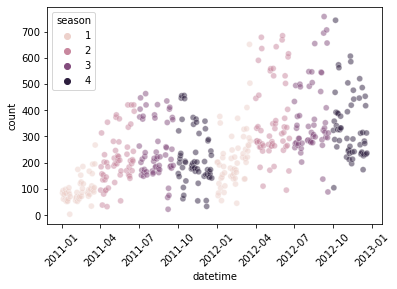

In [154]:
sns.scatterplot(df_12h.index, df_12h["count"], hue=df_12h["season"], alpha=0.5)
plt.xticks(rotation = 45);

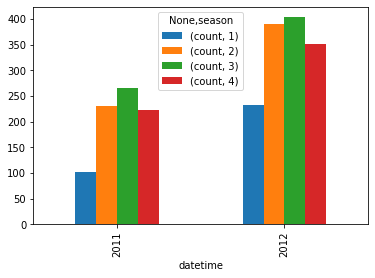

In [153]:
dev_over_time = df_awake.groupby([df_awake.index.year, "season"])["count"].mean().to_frame()
dev_over_time.unstack().plot(kind = 'bar');

Observation:
* There is an overall trend towards higher usage over the observed period
* There are usually low "count" numbers in winter
* Highest "count" numbers are archieved in spring and summer

### Plot atemp against count depending on season

/Users/danielbarenheuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


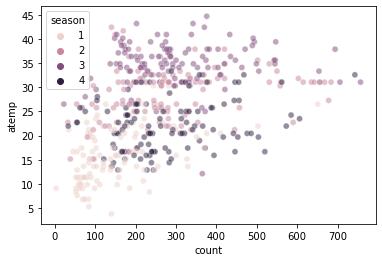

In [147]:
sns.scatterplot(df_12h["count"], df_12h["atemp"], hue=df_12h["season"], alpha=0.5);

Observation:

* High "count" numbers are especially achieved in spring and summer
* Low "count" numbers are recoreded in winter

### Plot atemp against count depending on weather

/Users/danielbarenheuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


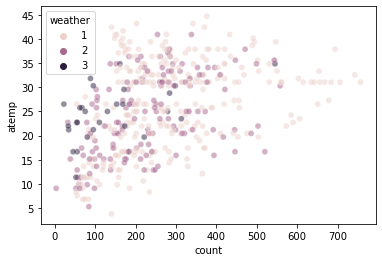

In [146]:
sns.scatterplot(df_12h["count"], df_12h["atemp"], hue=df_12h["weather"], alpha=0.5);

Observation:
* There is a clear correlation between sunny weather and the count
* The optimal "feeled temperature" for a high count seems to lie between 20 and 35 degrees

### Compare business day/holiday: amount of rented bikes at 18:00 

In [143]:
df_h = df_awake[(df_awake["holiday"] == 1) & (df_awake.index.hour == 18)]
holiday_mean_count_18 = df_h["count"].mean()
int(round(holiday_mean_count_18, 0))

345

In [145]:
df_w = df_awake[(df_awake["workingday"] == 1) & (df_awake.index.hour == 18)]
business_mean_count_18 = df_w["count"].mean()
int(round(business_mean_count_18, 0))

495

Observation:
* There is a higher mean "count" 6PM on working days compared to business days

### Plot count and distinguish depending on weather

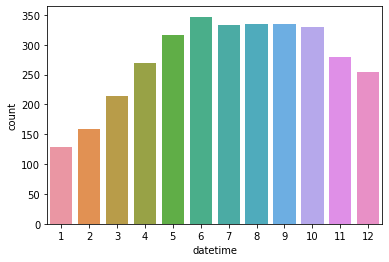

In [138]:
dev_months = df_awake.groupby([df_awake.index.month])["count"].mean().to_frame()
sns.barplot(data=dev_months, x=dev_months.index, y="count");

Observations:
* Highest mean "count" is recorded in June
* Mean number of rented bikes is pretty stable between June and October
* Lowest usage of the service occurs between January and 

### Plot season against count and distinguish depending on weather

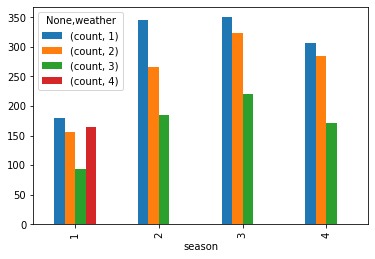

In [132]:
season_weather = df_awake.groupby(["season", "weather"])["count"].mean().to_frame()
season_weather.unstack().plot(kind = 'bar');

Observation:
* Especially in spring good weather affects the amount of rented bikes
* In summer and autumn the the difference between weather condition 1 and 2 is not very big
* Weather condition 3 results in every season in a much lower amount of rented bikes

### Plot count against datetime.hour and distinguish depending on season

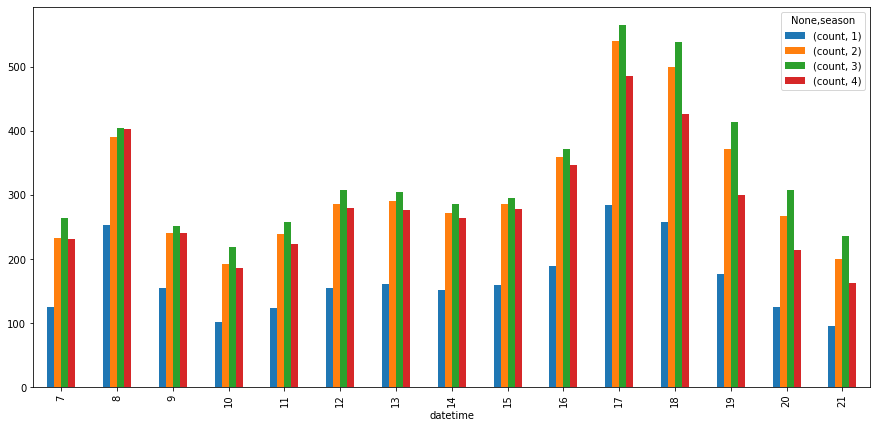

In [131]:
hour_season = df_awake.groupby([df_awake.index.hour, "season"])["count"].mean().to_frame()
hour_season.unstack().plot(kind = 'bar', figsize=(15, 7));

Observation:

* Highest "count" values are reached at 8:00 and between 17:00 - 19:00
* Lowest values are recorded between 9:00 and 11:00

### Create subsets for all for season with data ponts at 12:00 and 18:00

In [ ]:
df_season_1 = df[(df["season"] == 1) & ((df.index.hour == 12) | (df.index.hour == 18))]
df_season_2 = df[(df["season"] == 2) & ((df.index.hour == 12) | (df.index.hour == 18))]
df_season_3 = df[(df["season"] == 3) & ((df.index.hour == 12) | (df.index.hour == 18))]
df_season_4 = df[(df["season"] == 4) & ((df.index.hour == 12) | (df.index.hour == 18))]

### Which factors contribute most to the number of bicycles being checked out over the course of a given day?

* Weather
* Season (month)
* Time of the day
*